## Importing All Required Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. Nabil Bank (nabil) Stock Price Dataset

In [28]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [29]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [30]:
df.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [31]:
df.duplicated().sum()

1

In [32]:
df.columns = df.columns.get_level_values(0)

## Copying the dataset for future use

In [33]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [34]:
df.reset_index(drop=True, inplace=True)

### Renaming and Dropping unwanted column

In [35]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)

### Splitting into features and target

In [37]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [39]:
X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

### Model Building using Random Forest Regression



In [40]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [41]:
model.score(X_train, y_train)

0.9998050981066695

In [42]:
predicted = model.predict(X_test)
predicted

array([1107.73084095, 1091.31735389, 1083.45550992, 1071.20141739,
       1069.72627778, 1084.17166678, 1073.64242274, 1057.1991107 ,
       1065.88901544, 1071.12752128, 1067.96384921, 1057.14110854,
       1042.413739  , 1043.96297219, 1035.37868466, 1000.04456729,
       1004.37124441, 1007.25309449, 1001.24978951, 1059.59836991,
       1091.13919754, 1091.19180865, 1068.71513856, 1064.18056316,
       1055.18471171, 1056.27678675, 1047.56454174, 1042.12500164,
       1038.66165308, 1015.10547619, 1002.85363707,  997.92633261,
       1005.86620978, 1002.29300291,  993.69166034,  982.18858413,
        971.8181707 ,  968.26864602,  975.71781247,  971.5223593 ,
        962.11283599,  975.68006247,  966.37935843,  946.9896392 ,
        946.02585814,  925.79323557,  935.46848724,  964.77139131,
        943.45174228,  933.45661712,  929.80697955,  924.67479799,
        907.93550774,  903.7254711 ,  896.30861052,  901.30957812,
        901.73076569,  929.90154783,  932.87088911,  923.91853

In [43]:
prediction = pd.DataFrame({'Date': df.Date[round(df.shape[0]*0.8):], 'Actual': y_test, 'Predicted': predicted})
prediction.set_index('Date', inplace=True)
prediction

,Actual,Predicted
Date,,
2022-02-09,1100.9,1107.730841
2022-02-10,1097.1,1091.317354
2022-02-13,1070.0,1083.455510
2022-02-14,1064.0,1071.201417
2022-02-15,1075.0,1069.726278
...,...,...
2024-09-18,556.0,663.420000
2024-09-22,562.0,663.420000
2024-09-23,568.0,663.420000


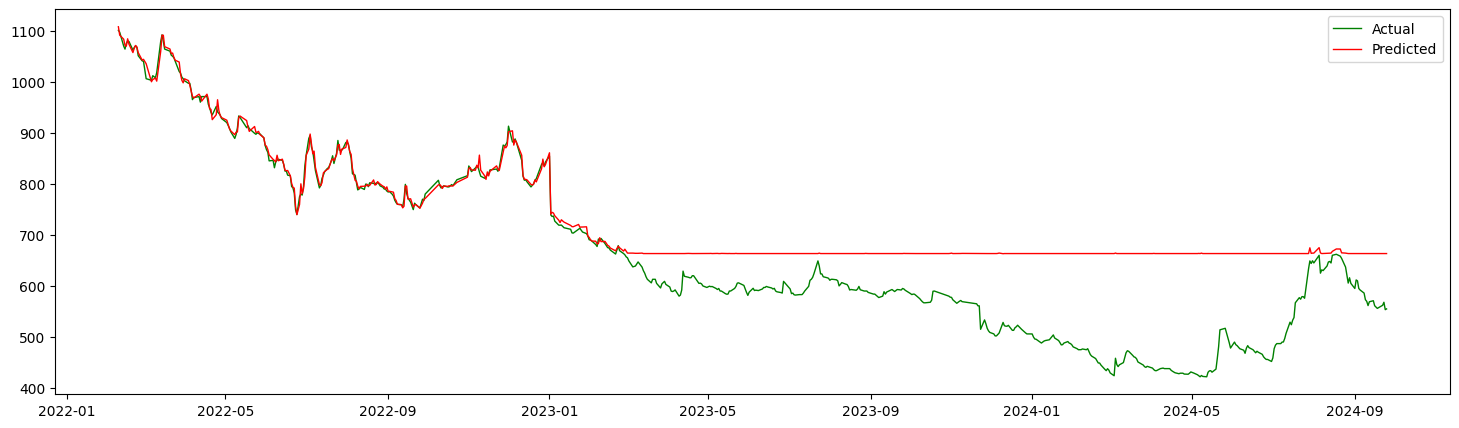

In [44]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

## Calculating the Performance Evaluation Metrics

In [45]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 11025.885045207871
Root Mean Squared Error: 105.00421441641221
Mean Absolute Error: 72.41793955041831


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [46]:
model_params = {
    'n_estimators': [5, 10, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    }

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), model_params, cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 100, 200]})

In [47]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [48]:
grid_search.best_score_

0.9951070002885224

In [49]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([1108.33502981, 1092.51546198, 1083.73315151, 1071.41064187,
       1070.13960852, 1084.02622293, 1076.04359198, 1059.33389239,
       1066.51558864, 1071.02525794, 1068.91247161, 1057.40019709,
       1041.67826783, 1044.39122875, 1036.60131187, 1005.31992594,
       1004.9562497 , 1009.72233989, 1004.89553652, 1058.67802461,
       1090.68207016, 1089.65647889, 1067.78945331, 1064.40163102,
       1055.62910948, 1056.07778378, 1048.20828831, 1041.99620405,
       1038.9460781 , 1016.83791713, 1007.28936696,  999.36828814,
       1007.07945757, 1002.04502738,  993.26639782,  983.08117677,
        970.84062587,  967.9944097 ,  975.02097301,  970.23575682,
        962.37053448,  975.65064166,  965.39086664,  945.01233973,
        945.45097798,  923.65410332,  933.84182218,  962.24576761,
        943.10611565,  932.43642709,  927.93971667,  923.12740002,
        906.66253018,  903.50091302,  895.18013388,  901.39297768,
        900.82972406,  928.43851391,  931.5674183 ,  923.78602

In [50]:
prediction = pd.DataFrame({'Date': df.Date[round(df.shape[0]*0.8):], 'Actual': y_test, 'Predicted': grid_search_prediction})
prediction.set_index('Date', inplace=True)
prediction

,Actual,Predicted
Date,,
2022-02-09,1100.9,1108.335030
2022-02-10,1097.1,1092.515462
2022-02-13,1070.0,1083.733152
2022-02-14,1064.0,1071.410642
2022-02-15,1075.0,1070.139609
...,...,...
2024-09-18,556.0,664.939405
2024-09-22,562.0,664.939405
2024-09-23,568.0,664.939405


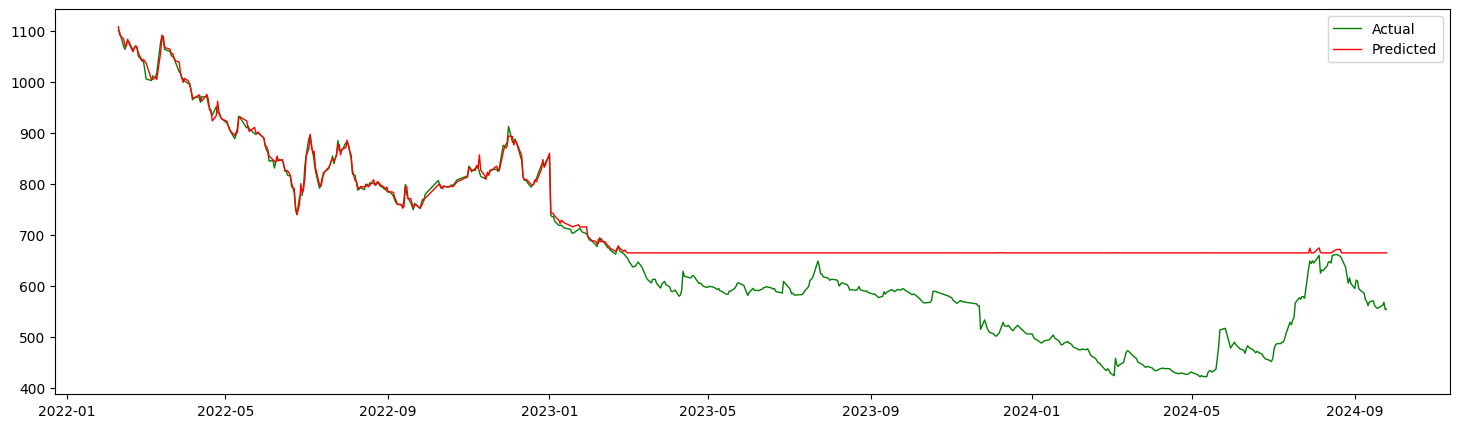

In [51]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

### Performance Evaluation Metrics after Hyperparameter Tuning

In [52]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 11235.203701695507
Root Mean Squared Error: 105.99624380937047
Mean Absolute Error: 73.24217504894939
